# 3. データを前処理する

# 3-1. 訓練データとテストデータへの分類

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import(f1_score, make_scorer)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train_raw = npz['X']
y_train_raw = npz['y']

X_valid_raw = npz['X']
y_valid_raw = npz['y']

# 3-2. 標準化・データのレンジ

In [3]:
X_train_scaled = X_train_raw/255.
y_train_scaled = y_train_raw.copy()

X_valid_scaled = X_train_raw/255.
y_valid_scaled = y_train_raw.copy()

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_scaled,
                                                     shuffle=True, test_size=0.2, stratify=y_train_scaled)
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train.shape, y_train.shape))
print("Valid data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid.shape, y_valid.shape))

Train data shape, X_train.shape:(36381, 28, 28) y_train.shape:(36381,)
Valid data shape, X_valid.shape:(9096, 28, 28) y_valid.shape:(9096,)


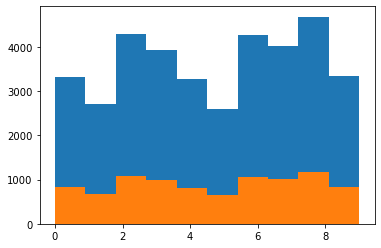

In [5]:
plt.hist(y_train)
plt.hist(y_valid)
plt.show()

# (iii)SVMを用いる

# 4. 訓練データでモデルを学習する

In [6]:
X_train_linearSVC, X_valid_linearSVC = X_train.reshape(-1, 28*28), X_valid.reshape(-1, 28*28)
print(X_train_linearSVC.shape)
print(X_valid_linearSVC.shape)

#インスタンス化
linsvc_clf = LinearSVC()

(36381, 784)
(9096, 784)


In [7]:
linsvc_clf.fit(X_train_linearSVC, y_train)

C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [8]:
#学習のパラメータ
linsvc_clf.coef_.shape

(10, 784)

# 5. 精度を評価する

In [9]:
y_train_linearSVC_predict = linsvc_clf.predict(X_train_linearSVC)
y_valid_linearSVC_predict = linsvc_clf.predict(X_valid_linearSVC)

accuracy_linsvc_train = accuracy_score(y_train, y_train_linearSVC_predict)
accuracy_linsvc_valid = accuracy_score(y_valid, y_valid_linearSVC_predict)

print("Train accuracy", accuracy_linsvc_train)
print("Valid accuracy", accuracy_linsvc_valid)

Train accuracy 0.9321623924576015
Valid accuracy 0.911169744942832


In [10]:
matrix_linearSVC_train = confusion_matrix(y_train, y_train_linearSVC_predict)
matrix_linearSVC_train

array([[3255,    0,    7,    5,    3,    6,   19,    1,   20,    1],
       [   1, 2634,   14,    5,    0,    5,    3,    4,   28,    3],
       [  22,   16, 3954,   52,   34,   14,   37,   44,  106,   10],
       [   9,   10,  100, 3562,    3,   88,    9,   27,   83,   32],
       [   2,   11,   17,    5, 3075,    3,   18,    4,   34,  102],
       [  17,    6,   17,   96,   17, 2281,   50,    7,   85,   26],
       [  17,    2,   18,    2,   16,   35, 4138,    2,   28,    3],
       [   6,    9,   35,    8,   28,    2,    5, 3822,   12,   82],
       [  27,   57,   53,  102,   28,   79,   43,   26, 4217,   49],
       [  16,    7,   13,   63,   96,   18,    3,  109,   31, 2975]],
      dtype=int64)

In [14]:
matrix_linearSVC_valid = confusion_matrix(y_valid, y_valid_linearSVC_predict)
matrix_linearSVC_valid

array([[ 786,    0,    5,    4,    4,    7,    8,    0,   13,    2],
       [   0,  647,    6,    1,    0,    3,    2,    3,   10,    2],
       [   9,   10,  966,   11,   10,    3,   11,   10,   41,    2],
       [   3,    5,   22,  875,    3,   18,    4,   15,   25,   11],
       [   1,    4,    6,    0,  748,    2,    7,    3,   10,   37],
       [   5,    2,    6,   26,   12,  535,   19,    9,   22,   14],
       [   8,    2,   11,    0,    5,   13, 1021,    1,    4,    0],
       [   2,    4,   15,    2,    7,    4,    1,  938,    4,   26],
       [   4,   18,   15,   29,    4,   25,   12,    5, 1042,   16],
       [   4,    2,    6,   15,   36,    7,    0,   25,    8,  730]],
      dtype=int64)

In [15]:
#適合率
precision_score(y_train, y_train_linearSVC_predict, average="macro")

0.9319631311823262

In [16]:
#再現率
recall_score(y_train, y_train_linearSVC_predict, average="macro")

0.9323023328425653

In [18]:
#適合率
precision_score(y_valid, y_valid_linearSVC_predict, average="macro")

0.910302877220257

In [19]:
#再現率
recall_score(y_valid, y_valid_linearSVC_predict, average="macro")

0.909862855758418

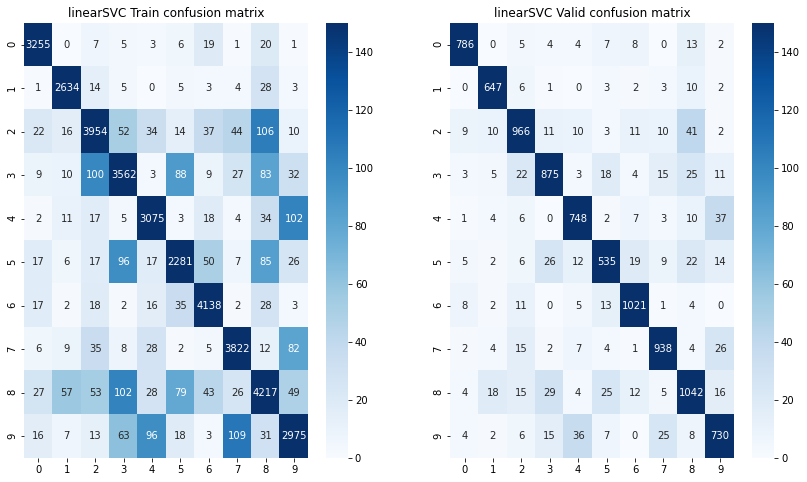

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

sns.heatmap(matrix_linearSVC_train, annot=True, fmt='g', cmap='Blues', vmin=0, vmax=150, ax=axs[0])
sns.heatmap(matrix_linearSVC_valid, annot=True, fmt='g', cmap='Blues', vmin=0, vmax=150, ax=axs[1])

axs[0].set_title("linearSVC Train confusion matrix")
axs[1].set_title("linearSVC Valid confusion matrix")
plt.show()

In [21]:
#標準化した訓練データ・テストデータ
X_train_scaled_linearSVC, X_valid_scaled_linearSVC = X_train_scaled.reshape(-1, 28*28), X_valid_scaled.reshape(-1, 28*28)
print(X_train_scaled_linearSVC.shape)
print(X_valid_scaled_linearSVC.shape)

linsvc_clf = LinearSVC()

(45477, 784)
(45477, 784)


In [22]:
linsvc_clf.fit(X_train_scaled_linearSVC, y_train_scaled)

C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [23]:
y_train_scaled_linearSVC_predict = linsvc_clf.predict(X_train_scaled_linearSVC)
y_valid_scaled_linearSVC_predict = linsvc_clf.predict(X_valid_scaled_linearSVC)

accuracy_linsvc_train_scaled = accuracy_score(y_train_scaled, y_train_scaled_linearSVC_predict)
accuracy_linsvc_valid_scaled = accuracy_score(y_valid_scaled, y_valid_scaled_linearSVC_predict)

print("Train Scaled accuracy", accuracy_linsvc_train_scaled)
print("Valid Scaled accuracy", accuracy_linsvc_valid_scaled)

Train Scaled accuracy 0.9295468038788838
Valid Scaled accuracy 0.9295468038788838


In [24]:
matrix_linearSVC_train_scaled = confusion_matrix(y_train_scaled, y_train_scaled_linearSVC_predict)
matrix_linearSVC_train_scaled

array([[4059,    0,    8,    6,    7,   10,   19,    2,   33,    2],
       [   1, 3281,   16,    7,    0,   12,    4,    8,   36,    6],
       [  30,   20, 4935,   68,   47,   12,   45,   58,  133,   14],
       [  12,   13,  124, 4438,    5,  106,   14,   42,  108,   42],
       [   4,   17,   20,    4, 3839,    6,   19,    9,   44,  127],
       [  26,    7,   23,  115,   27, 2830,   69,   15,  104,   36],
       [  26,    2,   28,    3,   24,   47, 5157,    2,   34,    3],
       [  10,   14,   48,   13,   37,    8,    4, 4750,   18,  110],
       [  34,   78,   66,  126,   34,   94,   51,   27, 5275,   66],
       [  17,    8,   18,   80,  127,   25,    4,  135,   41, 3709]],
      dtype=int64)

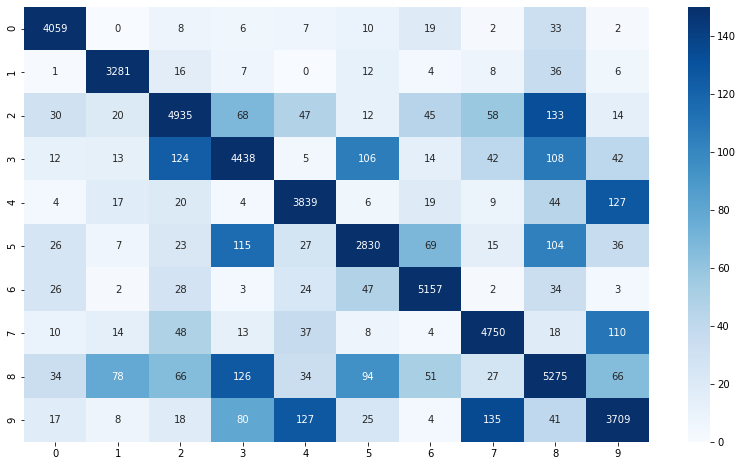

In [25]:
plt.figure(figsize=(14, 8))
sns.heatmap(matrix_linearSVC_train_scaled, annot=True, fmt='g', cmap='Blues', vmin=0, vmax=150)
plt.show()

# 6. 再調整

# 6-1. グリッドサーチの総当たりの範囲

In [26]:
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_raw = npz['X']
y_raw = npz['y']

In [27]:
X_train_adj, X_valid_adj, y_train_adj, y_valid_adj = train_test_split(X_raw, y_raw,
                                                      shuffle=True, test_size=0.20, stratify=y_raw)
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train_adj.shape, y_train_adj.shape))
print("Train data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid_adj.shape, y_valid_adj.shape))

Train data shape, X_train.shape:(36381, 28, 28) y_train.shape:(36381,)
Train data shape, X_valid.shape:(9096, 28, 28) y_valid.shape:(9096,)


In [28]:
X_train = (X_train_adj/255.).reshape(-1, 28*28)
X_valid = (X_valid_adj/255.).reshape(-1, 28*28)
y_train = y_train_adj.copy().reshape(-1, 1)
y_valid = y_valid_adj.copy().reshape(-1, 1)

In [36]:
linsvc_clf = LinearSVC()

param_grid = {
    "penalty":["l1", "l2"],
    "C":[0.0, 0.001, 0.005, 0.01, 0.05, 0.1],
}

scoring = {
    "accuracy": make_scorer(accuracy_score),
    "recall": make_scorer(recall_score, average="micro"),
    "precision": make_scorer(precision_score, average="micro"), 
    "f1": make_scorer(f1_score, average="micro"),
}

cv = 5
refit = False
return_train_score = True
verbose = 3

In [37]:
grid_search_v1 = GridSearchCV(
    linsvc_clf,
    param_grid,
    scoring=scoring,
    cv=cv,
    refit=refit, 
    return_train_score=return_train_score,
    verbose=verbose)

In [38]:
grid_search_v1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.0, penalty=l1 ...............................................
[CV]  C=0.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in 

[CV]  C=0.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l1 ...............................................
[CV]  C=0.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l1 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l1 ...............................................
[CV]  C=0.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=0.0, penalty=l2 ...............................................
[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm

[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=0.001, penalty=l1 .............................................
[CV]  C=0.001, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.001, penalty=l1 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.001, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.001, penalty=l1 .............................................
[CV]  C=0.001, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.001, penalty=l1 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.001, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.001, penalty=l1 .............................................
[CV]  C=0.001, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.001, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.001, penalty=l2, accuracy=(train=0.904, test=0.902), f1=(train=0.904, test=0.902), precision=(train=0.904, test=0.902), recall=(train=0.904, test=0.902), total=   1.5s
[CV] C=0.001, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.001, penalty=l2, accuracy=(train=0.904, test=0.900), f1=(train=0.904, test=0.900), precision=(train=0.904, test=0.900), recall=(train=0.904, test=0.900), total=   1.2s
[CV] C=0.001, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.001, penalty=l2, accuracy=(train=0.905, test=0.898), f1=(train=0.905, test=0.898), precision=(train=0.905, test=0.898), recall=(train=0.905, test=0.898), total=   1.2s
[CV] C=0.001, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.001, penalty=l2, accuracy=(train=0.904, test=0.902), f1=(train=0.904, test=0.902), precision=(train=0.904, test=0.902), recall=(train=0.904, test=0.902), total=   1.2s
[CV] C=0.001, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.001, penalty=l2, accuracy=(train=0.905, test=0.894), f1=(train=0.905, test=0.894), precision=(train=0.905, test=0.894), recall=(train=0.905, test=0.894), total=   1.2s
[CV] C=0.005, penalty=l1 .............................................
[CV]  C=0.005, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.005, penalty=l1 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.005, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.005, penalty=l1 .............................................
[CV]  C=0.005, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.005, penalty=l1 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.005, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.005, penalty=l1 .............................................
[CV]  C=0.005, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.005, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.005, penalty=l2, accuracy=(train=0.917, test=0.911), f1=(train=0.917, test=0.911), precision=(train=0.917, test=0.911), recall=(train=0.917, test=0.911), total=   1.5s
[CV] C=0.005, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.005, penalty=l2, accuracy=(train=0.918, test=0.909), f1=(train=0.918, test=0.909), precision=(train=0.918, test=0.909), recall=(train=0.918, test=0.909), total=   1.5s
[CV] C=0.005, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.005, penalty=l2, accuracy=(train=0.918, test=0.907), f1=(train=0.918, test=0.907), precision=(train=0.918, test=0.907), recall=(train=0.918, test=0.907), total=   1.5s
[CV] C=0.005, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.005, penalty=l2, accuracy=(train=0.916, test=0.911), f1=(train=0.916, test=0.911), precision=(train=0.916, test=0.911), recall=(train=0.916, test=0.911), total=   1.5s
[CV] C=0.005, penalty=l2 .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.005, penalty=l2, accuracy=(train=0.919, test=0.902), f1=(train=0.919, test=0.902), precision=(train=0.919, test=0.902), recall=(train=0.919, test=0.902), total=   1.5s
[CV] C=0.01, penalty=l1 ..............................................
[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................
[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................
[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.01, penalty=l2, accuracy=(train=0.921, test=0.912), f1=(train=0.921, test=0.912), precision=(train=0.921, test=0.912), recall=(train=0.921, test=0.912), total=   1.9s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.01, penalty=l2, accuracy=(train=0.921, test=0.911), f1=(train=0.921, test=0.911), precision=(train=0.921, test=0.911), recall=(train=0.921, test=0.911), total=   1.9s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.01, penalty=l2, accuracy=(train=0.922, test=0.908), f1=(train=0.922, test=0.908), precision=(train=0.922, test=0.908), recall=(train=0.922, test=0.908), total=   1.9s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.01, penalty=l2, accuracy=(train=0.920, test=0.912), f1=(train=0.920, test=0.912), precision=(train=0.920, test=0.912), recall=(train=0.920, test=0.912), total=   2.0s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.01, penalty=l2, accuracy=(train=0.923, test=0.904), f1=(train=0.923, test=0.904), precision=(train=0.923, test=0.904), recall=(train=0.923, test=0.904), total=   1.9s
[CV] C=0.05, penalty=l1 ..............................................
[CV]  C=0.05, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.05, penalty=l1 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.05, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.05, penalty=l1 ..............................................
[CV]  C=0.05, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.05, penalty=l1 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.05, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.05, penalty=l1 ..............................................
[CV]  C=0.05, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.05, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.05, penalty=l2, accuracy=(train=0.926, test=0.911), f1=(train=0.926, test=0.911), precision=(train=0.926, test=0.911), recall=(train=0.926, test=0.911), total=   5.2s
[CV] C=0.05, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.05, penalty=l2, accuracy=(train=0.928, test=0.911), f1=(train=0.928, test=0.911), precision=(train=0.928, test=0.911), recall=(train=0.928, test=0.911), total=   5.5s
[CV] C=0.05, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.05, penalty=l2, accuracy=(train=0.928, test=0.908), f1=(train=0.928, test=0.908), precision=(train=0.928, test=0.908), recall=(train=0.928, test=0.908), total=   5.1s
[CV] C=0.05, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.05, penalty=l2, accuracy=(train=0.926, test=0.914), f1=(train=0.926, test=0.914), precision=(train=0.926, test=0.914), recall=(train=0.926, test=0.914), total=   5.3s
[CV] C=0.05, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.05, penalty=l2, accuracy=(train=0.928, test=0.904), f1=(train=0.928, test=0.904), precision=(train=0.928, test=0.904), recall=(train=0.928, test=0.904), total=   5.2s
[CV] C=0.1, penalty=l1 ...............................................
[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l1 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l1 ...............................................
[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l1 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l1 ...............................................
[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.1, penalty=l2, accuracy=(train=0.929, test=0.911), f1=(train=0.929, test=0.911), precision=(train=0.929, test=0.911), recall=(train=0.929, test=0.911), total=  10.1s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.1, penalty=l2, accuracy=(train=0.930, test=0.911), f1=(train=0.930, test=0.911), precision=(train=0.930, test=0.911), recall=(train=0.930, test=0.911), total=   9.0s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.1, penalty=l2, accuracy=(train=0.930, test=0.906), f1=(train=0.930, test=0.906), precision=(train=0.930, test=0.906), recall=(train=0.930, test=0.906), total=   8.7s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.1, penalty=l2, accuracy=(train=0.929, test=0.913), f1=(train=0.929, test=0.913), precision=(train=0.929, test=0.913), recall=(train=0.929, test=0.913), total=   8.9s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.1, penalty=l2, accuracy=(train=0.931, test=0.904), f1=(train=0.931, test=0.904), precision=(train=0.931, test=0.904), recall=(train=0.931, test=0.904), total=   9.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.0, 0.001, 0.005, 0.01, 0.05, 0.1],
                         'penalty': ['l1', 'l2']},
             refit=False, return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=micro),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)},
             verbose=3)

In [39]:
grid_search_v1.cv_results_

{'mean_fit_time': array([0.10895777, 0.22024307, 0.10378156, 1.19552231, 0.10592527,
        1.47351599, 0.10724421, 1.90568614, 0.1059413 , 5.22277451,
        0.10835295, 9.09611769]),
 'std_fit_time': array([0.0114196 , 0.01541999, 0.00271546, 0.12043652, 0.00335077,
        0.01636545, 0.01119799, 0.01335604, 0.00360792, 0.13704734,
        0.01038242, 0.47299311]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.02989445, 0.        ,
        0.03123374, 0.        , 0.0274754 , 0.        , 0.03000045,
        0.        , 0.03117404]),
 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.79755795e-03,
        0.00000000e+00, 1.52523802e-05, 0.00000000e+00, 6.07049646e-03,
        0.00000000e+00, 2.43957089e-03, 0.00000000e+00, 1.34638550e-04]),
 'param_C': masked_array(data=[0.0, 0.0, 0.001, 0.001, 0.005, 0.005, 0.01, 0.01, 0.05,
                    0.05, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
  

In [40]:
params = grid_search_v1.cv_results_['params']
accuracy_list = grid_search_v1.cv_results_['mean_test_accuracy']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["test_acc"] = accuracy
    result_list.append(param)

In [41]:
df_result_v1 = pd.DataFrame(result_list)
df_result_v1

,C,penalty,test_acc
0,0.000,l1,NaN
1,0.000,l2,NaN
2,0.001,l1,NaN
3,0.001,l2,0.899123
4,0.005,l1,NaN
5,0.005,l2,0.908029
6,0.010,l1,NaN
7,0.010,l2,0.909348
8,0.050,l1,NaN
9,0.050,l2,0.909293


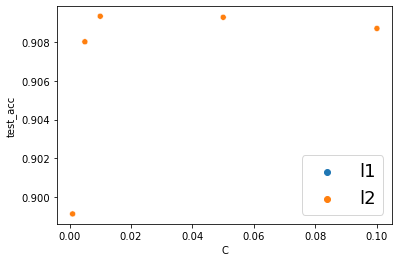

In [42]:
sns.scatterplot(data=df_result_v1, x="C", y="test_acc", hue="penalty")
plt.legend(loc= 'lower right', fontsize=18)
plt.show()

線形SVMでは、C=0.01のとき精度が最も高いという結果が得られた。